In [1]:
from google.colab import files
file = files.upload()

Saving amzn_stock.csv to amzn_stock.csv


# Determining the normality of stock market returns 
確定股票市場收益的正態性

In [2]:
import pandas as pd
import numpy as np

In [3]:
amzn = pd.read_csv('./amzn_stock.csv',index_col='Date',parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [4]:
# Create a Series by selecting only the closing price and 
#then using the pct_change method to get the daily rate 
#of return:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

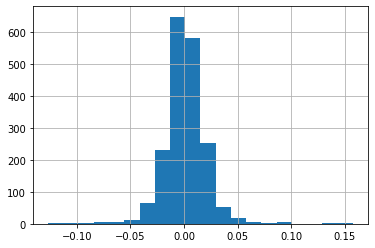

In [5]:
#Drop the missing value and plot a histogram of the returns to visually inspect the distribution
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

We will now calculate the percentage of daily returns that fall between 1, 2, and 3 standard deviations from the mean.

In [6]:
mean = amzn_daily_return.mean()
#standard deviations
std = amzn_daily_return.std()

In [7]:
#Calculate the absolute value of the z-score for each observation.
#The z-score is the number of standard deviations away from the mean:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [10]:
#Find the percentage of returns that are within 1, 2, and 
#3 standard deviations:
#We can conclude that Amazon's daily stock returns do not follow a normal distribution.
pcts = [abs_z_score.lt(i).mean()for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation.'
'{:.3f} within 2 and {:.3f}within 3'.format(*pcts))

0.787 fall within 1 standard deviation.0.956 within 2 and 0.985within 3


In [9]:
# To automate this 

def test_return_normality(stock_data):
  close = stock_data['Close']
  daily_return = close.pct_change().dropna()
  daily_return.hist(bins=20)
  mean = daily_return.mean()
  std = daily_return.std()
  abs_z_score = abs(daily_return - mean) / std
  pcts = [abs_z_score.lt(i).mean()for i in range(1,4)]

print('{:.3f} fall within 1 standard deviation.'
'{:.3f} within 2 and {:.3f}within 3'.format(*pcts))

0.787 fall within 1 standard deviation.0.956 within 2 and 0.985within 3


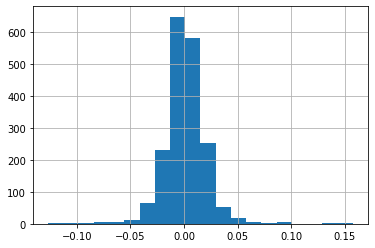

In [11]:
slb=pd.read_csv('./amzn_stock.csv',index_col='Date',parse_dates=['Date'])
test_return_normality(slb)